In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sklearn
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# loading the CSV-File with pandas
labels = pd.read_csv('labels.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
# checking is there any missing value
labels.isnull().values.any()

False

In [4]:
# check first 10 rows of data
labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [5]:
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [6]:
# take a look the basic information 
labels.describe(include="all")

,id,breed
count,10222,10222
unique,10222,120
top,48e96993f29d3cea4a33c1a6fadf2bc1,scottish_deerhound
freq,1,126


we could see there is 120 unique breed based  on 10222 entires in the dataset

In [7]:
# how many total different breeds in it
pd.value_counts(labels['breed']).count()

120

In [8]:
# I will do a pivot table

breed_counts = pd.pivot_table(labels, index=['breed'], aggfunc='count')
# rename the column

breed_counts = breed_counts.rename(columns = {"id" : "count"})

# show in desending order 
breed_counts = breed_counts.sort_values("count", ascending=False)

# show top 5
breed_counts.head()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [9]:
breed_counts.tail()

,count
breed,
golden_retriever,67
brabancon_griffon,67
komondor,67
briard,66
eskimo_dog,66


Text(0.5,1,'Distribution of Dog breeds')

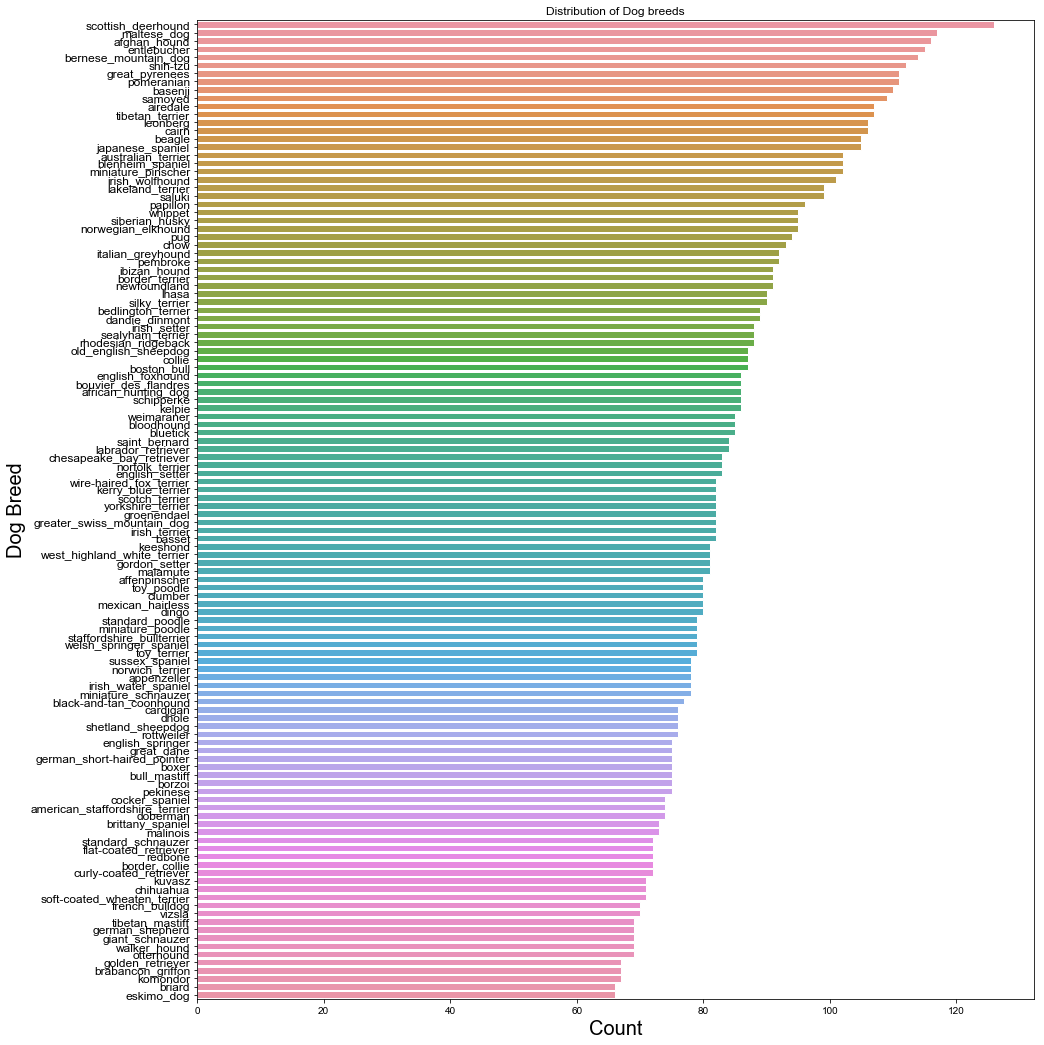

In [10]:
# Visualize training data distribution


fig, ax = plt.subplots()
fig.set_size_inches(15,18)
sns.set_style("whitegrid")

ax = sns.barplot(x = breed_counts['count'], y = breed_counts.index, data = labels)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set(xlabel='Count',ylabel='Dog Breed')
ax.set_title('Distribution of Dog breeds')


Display the images

In [11]:
# loading the corresponding Images
from tqdm import tqdm
import cv2

In [12]:
# Helper-function for plotting images

def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(60,60),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        # Plot image.
        
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB).reshape(img_width,img_height,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(60)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    
    plt.show()

In [13]:
# Next we will read in all of the images for test and train, using a for loop through the values of the csv files.
# I have also set an im_width variable which sets the size for the image to be re-sized to, 128x128 px

img_width = 128
img_height = 128
images = []
classes = []

In [14]:
# load training images

for f, breed in tqdm(labels.values):
    img = cv2.imread('C:/Users/shell/Desktop/Project-1/train/{}.jpg'.format(f))
    classes.append(breed)
    images.append(cv2.resize(img, (img_width, img_height)))

100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [01:05<00:00, 156.04it/s]


Images to show: 9
Classes to show: 9


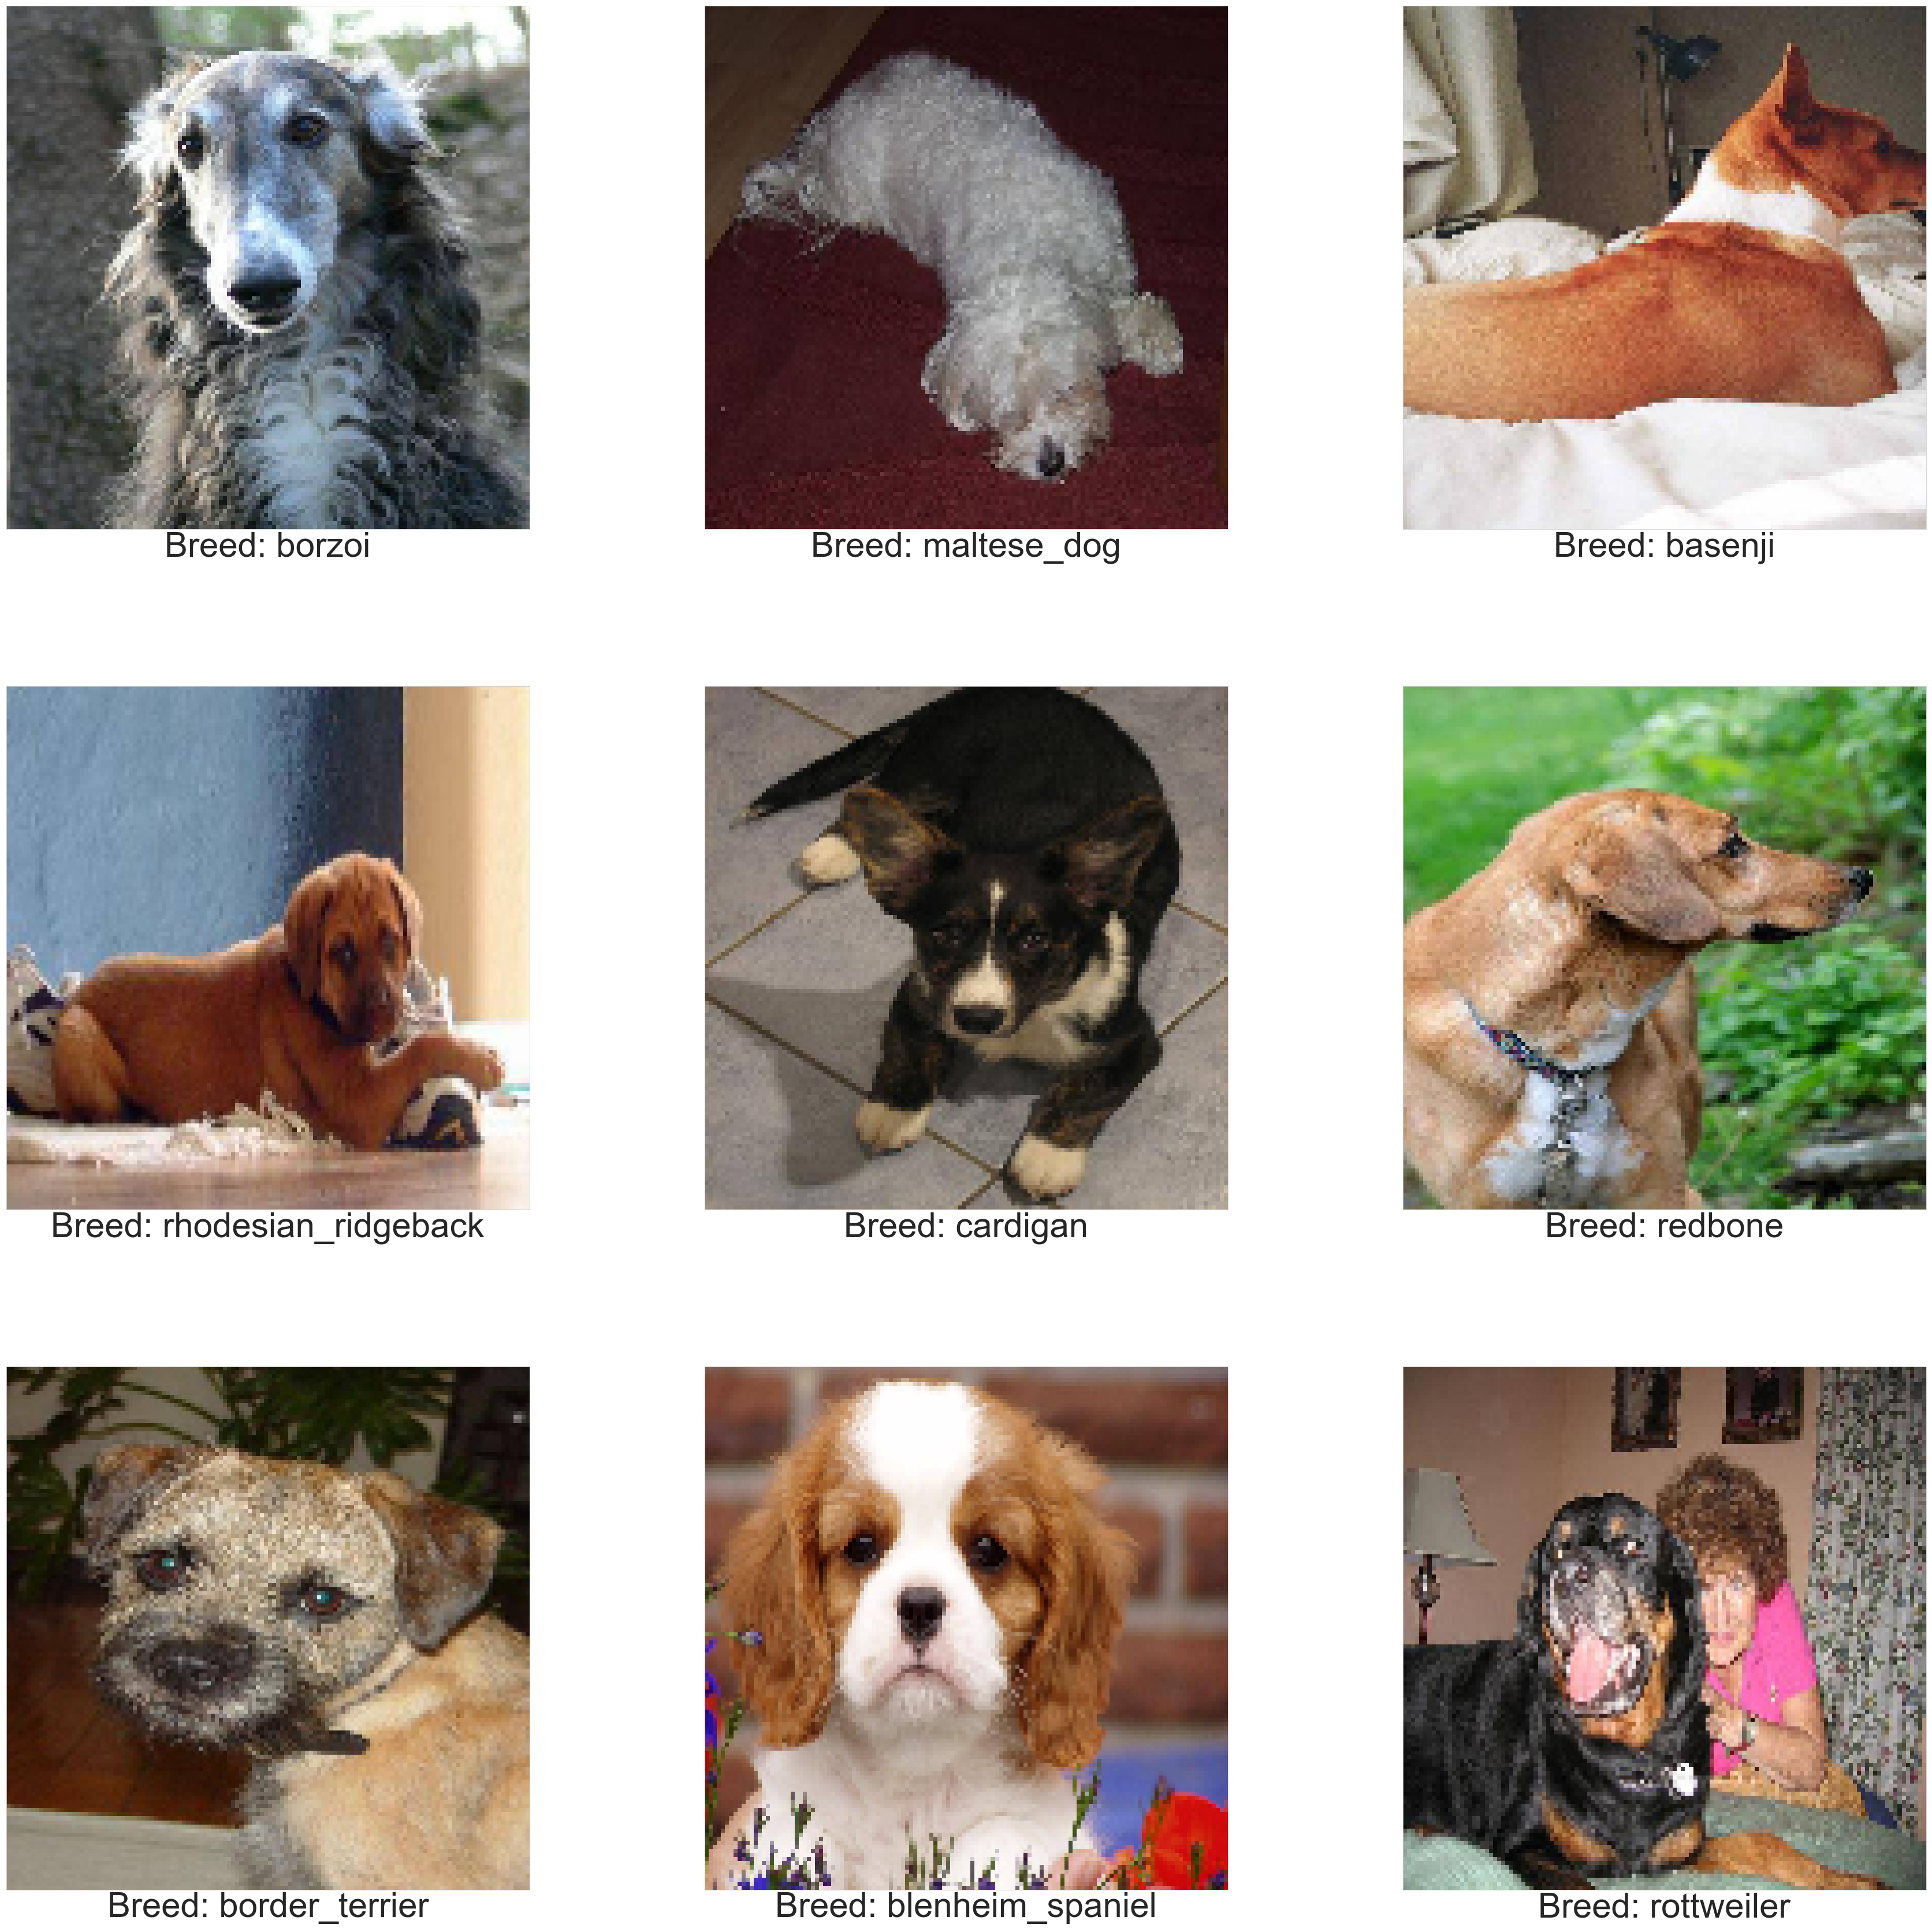

In [15]:
# plot some example images

# select random images
from random import randint

random_numbers = [randint(0, len(images)) for p in range(0,9)]
images_to_show = [images[i] for i in random_numbers]
classes_to_show = [classes[i] for i in random_numbers]
print("Images to show: {0}".format(len(images_to_show)))
print("Classes to show: {0}".format(len(classes_to_show)))

# plot the images
plot_images(images_to_show, classes_to_show)

### Reduce the 120 breeds to 20 breeds for the models

In [16]:
from sklearn.model_selection import train_test_split

['afghan_hound', 'airedale', 'australian_terrier', 'basenji', 'beagle', 'bernese_mountain_dog', 'blenheim_spaniel', 'cairn', 'entlebucher', 'great_pyrenees', 'irish_wolfhound', 'japanese_spaniel', 'leonberg', 'maltese_dog', 'miniature_pinscher', 'pomeranian', 'samoyed', 'scottish_deerhound', 'shih-tzu', 'tibetan_terrier']


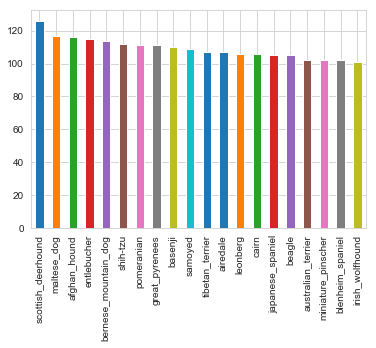

In [17]:
# reduce size to 20

num_breeds = 20
top_breeds = sorted(list(labels['breed'].value_counts().head(num_breeds).index))
sub_train_top_breeds = labels[labels['breed'].isin(top_breeds)]

# plot
sub_train_top_breeds.breed.value_counts().plot(kind='bar')

print(top_breeds)

In [18]:
# I will put the 20 breeds in a key-value pair
map_characters = {0:'afghan_hound', 1:'airedale', 2:'australian_terrier', 3:'basenji', 4:'beagle', 5:'bernese_mountain_dog', 
                  6:'blenheim_spaniel', 7:'cairn', 8:'entlebucher', 9:'great_pyrenees', 10:'irish_wolfhound', 11:'japanese_spaniel', 
                  12:'leonberg',13:'maltese_dog', 14:'miniature_pinscher', 15:'pomeranian', 16:'samoyed', 17:'scottish_deerhound', 
                  18:'shih-tzu', 19:'tibetan_terrier'}

In [59]:
print(map_charactersracters)

{0: 'afghan_hound', 1: 'airedale', 2: 'australian_terrier', 3: 'basenji', 4: 'beagle', 5: 'bernese_mountain_dog', 6: 'blenheim_spaniel', 7: 'cairn', 8: 'entlebucher', 9: 'great_pyrenees', 10: 'irish_wolfhound', 11: 'japanese_spaniel', 12: 'leonberg', 13: 'maltese_dog', 14: 'miniature_pinscher', 15: 'pomeranian', 16: 'samoyed', 17: 'scottish_deerhound', 18: 'shih-tzu', 19: 'tibetan_terrier'}


In [19]:
# we do one hot encoding to lableing the data

targets_series = pd.Series(sub_train_top_breeds['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

one_hot_labels = np.asarray(one_hot)
print(one_hot_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
# I have also set an im_size variable which sets the size for the image to be re-sized to, 128*128 px
im_size = 164
x_train = []
y_train = []

In [21]:
# loading the training data of all the images in the 20 breeds, using a for loop through the values of the csv files.
i = 0

for f, breed in tqdm(sub_train_top_breeds.values):
    img = cv2.imread('C:/Users/shell/Desktop/Project-1/train/{}.jpg'.format(f))
    label = one_hot_labels[i]
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(label)
    i += 1

100%|█████████████████████████████████████████████████████████████████████████████| 2184/2184 [00:13<00:00, 157.62it/s]


In [22]:
# we do the normolize for the image data in order to make it easier for nerual networks to learn 
x_train_raw = np.array(x_train, np.float32) / 255.
y_train_raw = np.array(y_train, np.uint8)

In [23]:
# check the shape of the ouputs to make sure everything went as expected
print(x_train_raw.shape)
print(y_train_raw.shape)

(2184, 164, 164, 3)
(2184, 20)


We can see above that there are 20 different breeds. We can put this in a num_class variable below that can then be used when creating the CNN model.


In [24]:
# Creating a variable to know the number of classes we have in the dataset.

num_class = y_train_raw.shape[1]

In [25]:
print(num_class)

20


In [26]:
# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

## Method 1 Convolutional Neural Network Approach

In [27]:
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import itertools

C:\Users\shell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
num_class = 20
im_size = 164
batch_size = 128
epochs = 10

In [29]:
# build the model by using sequential model
model = Sequential()

# now we add our 2D convolution layer 
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(im_size,im_size,3)))


# Next we add a 2D max pooling layer.  The definition of the layer is dead easy.  
# We simply specify the size of the pooling in the x and y directions – (2, 2) in this case. 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Next we add another convolutional + max pooling layer, with 64 output channels. 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# use dropout method for regularizing our model in order to prevent overfitting. 
model.add(Dropout(0.25))

# we want to flatten the output from these to enter our fully connected layers 
model.add(Flatten())
      
# hidden layer
# The next two lines declare our fully connected layers – using the Dense() layer in Keras

# we specify 128 nodes, each activated by a ReLU function
model.add(Dense(128, activation='relu')) # how many nerual in a layer = 128
model.add(Dropout(0.5))
    
# output layer - softmax calssification (for probability)
# which is the size of the number of our classes (20 in this case, for our 10 possible dog breeds).
model.add(Dense(num_class, activation='softmax'))


In [30]:
# compile our model
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [31]:
# we initiate the ImageDataGenerator

datagen = ImageDataGenerator(
                rotation_range = 20,  # randomly rotate images in the range (degrees, 0 to 180)
                width_shift_range = 0.2,  # randomly shift images horizontally (fraction of total width)
                height_shift_range = 0.2,  # randomly shift images vertically (fraction of total height)
                rescale = 1./255
                zoom_range=0.2
                horizontal_flip = True,  # randomly flip images
                fill_mode='nearest')  # filling in newly created pixels - can appear after a rotation or a width/height shift.

In [32]:
# Special callback to see learning curves
class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

In [33]:
# train the model 
model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs, validation_data = [x_test, y_test],
                    callbacks = [MetricsCheckpoint('logs')])

Epoch 1/10
48/47 [==============================] - ETA: 4:55 - loss: 2.9967 - acc: 0.031 - ETA: 3:55 - loss: 5.1820 - acc: 0.031 - ETA: 3:22 - loss: 4.7772 - acc: 0.052 - ETA: 3:04 - loss: 4.3401 - acc: 0.070 - ETA: 2:55 - loss: 4.0577 - acc: 0.081 - ETA: 2:44 - loss: 3.9228 - acc: 0.078 - ETA: 2:35 - loss: 3.7894 - acc: 0.067 - ETA: 2:27 - loss: 3.6873 - acc: 0.062 - ETA: 2:19 - loss: 3.6047 - acc: 0.066 - ETA: 2:12 - loss: 3.5533 - acc: 0.065 - ETA: 2:06 - loss: 3.4996 - acc: 0.071 - ETA: 2:03 - loss: 3.4566 - acc: 0.072 - ETA: 1:58 - loss: 3.4170 - acc: 0.076 - ETA: 1:53 - loss: 3.3896 - acc: 0.071 - ETA: 1:47 - loss: 3.3615 - acc: 0.066 - ETA: 1:42 - loss: 3.3393 - acc: 0.064 - ETA: 1:38 - loss: 3.3197 - acc: 0.066 - ETA: 1:34 - loss: 3.3015 - acc: 0.064 - ETA: 1:29 - loss: 3.2842 - acc: 0.064 - ETA: 1:25 - loss: 3.2701 - acc: 0.060 - ETA: 1:21 - loss: 3.2593 - acc: 0.058 - ETA: 1:17 - loss: 3.2471 - acc: 0.056 - ETA: 1:14 - loss: 3.2362 - acc: 0.057 - ETA: 1:10 - loss: 3.2265 - a

48/47 [==============================] - ETA: 1:41 - loss: 2.8292 - acc: 0.062 - ETA: 1:41 - loss: 2.8214 - acc: 0.125 - ETA: 1:48 - loss: 2.8455 - acc: 0.104 - ETA: 1:47 - loss: 2.8825 - acc: 0.117 - ETA: 1:46 - loss: 2.8780 - acc: 0.118 - ETA: 1:45 - loss: 2.8902 - acc: 0.104 - ETA: 1:44 - loss: 2.9279 - acc: 0.089 - ETA: 1:42 - loss: 2.9287 - acc: 0.093 - ETA: 1:47 - loss: 2.9247 - acc: 0.100 - ETA: 1:48 - loss: 2.9323 - acc: 0.093 - ETA: 1:46 - loss: 2.9302 - acc: 0.102 - ETA: 1:45 - loss: 2.9238 - acc: 0.104 - ETA: 1:45 - loss: 2.9105 - acc: 0.115 - ETA: 1:43 - loss: 2.8918 - acc: 0.118 - ETA: 1:40 - loss: 2.8961 - acc: 0.122 - ETA: 1:36 - loss: 2.9033 - acc: 0.121 - ETA: 1:34 - loss: 2.8999 - acc: 0.119 - ETA: 1:31 - loss: 2.8990 - acc: 0.118 - ETA: 1:28 - loss: 2.8941 - acc: 0.125 - ETA: 1:25 - loss: 2.8915 - acc: 0.123 - ETA: 1:22 - loss: 2.8925 - acc: 0.120 - ETA: 1:18 - loss: 2.8952 - acc: 0.120 - ETA: 1:14 - loss: 2.8943 - acc: 0.118 - ETA: 1:10 - loss: 2.8942 - acc: 0.118 -

48/47 [==============================] - ETA: 1:38 - loss: 2.8227 - acc: 0.093 - ETA: 1:54 - loss: 2.7539 - acc: 0.156 - ETA: 2:01 - loss: 2.6606 - acc: 0.187 - ETA: 1:54 - loss: 2.6846 - acc: 0.179 - ETA: 1:50 - loss: 2.7139 - acc: 0.168 - ETA: 1:56 - loss: 2.7408 - acc: 0.156 - ETA: 1:53 - loss: 2.7257 - acc: 0.156 - ETA: 1:51 - loss: 2.7019 - acc: 0.164 - ETA: 1:47 - loss: 2.7101 - acc: 0.163 - ETA: 1:44 - loss: 2.7054 - acc: 0.153 - ETA: 1:41 - loss: 2.6932 - acc: 0.159 - ETA: 1:36 - loss: 2.6915 - acc: 0.156 - ETA: 1:32 - loss: 2.6991 - acc: 0.156 - ETA: 1:29 - loss: 2.6899 - acc: 0.154 - ETA: 1:26 - loss: 2.6857 - acc: 0.160 - ETA: 1:23 - loss: 2.6734 - acc: 0.168 - ETA: 1:19 - loss: 2.6679 - acc: 0.169 - ETA: 1:17 - loss: 2.6704 - acc: 0.164 - ETA: 1:14 - loss: 2.6765 - acc: 0.162 - ETA: 1:11 - loss: 2.6688 - acc: 0.168 - ETA: 1:07 - loss: 2.6712 - acc: 0.171 - ETA: 1:05 - loss: 2.6728 - acc: 0.173 - ETA: 1:02 - loss: 2.6660 - acc: 0.179 - ETA: 59s - loss: 2.6705 - acc: 0.181 - 

In [34]:
# we can then evaluate it and print the results
score = model.evaluate(x_test, y_test, verbose = 0)

print('\nKeras CNN - loss:', score[0],'\n')
print('\nKeras CNN - accuracy:', score[1],'\n')


Keras CNN - loss: 2.520897923446283 


Keras CNN - accuracy: 0.20426829268292682 



In [35]:
# we finally do the predictions
import sklearn as sklearn
prediction = model.predict([x_test])

# if we just print prediction, it will show one hot array which is probability distributions
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(prediction, axis=1), target_names = list(map_characters.values())), sep='')  


                      precision    recall  f1-score   support

        afghan_hound       0.36      0.12      0.18        33
            airedale       0.10      0.10      0.10        29
  australian_terrier       0.18      0.36      0.24        25
             basenji       0.12      0.07      0.09        29
              beagle       0.10      0.11      0.10        37
bernese_mountain_dog       0.30      0.13      0.18        45
    blenheim_spaniel       0.33      0.06      0.11        31
               cairn       0.00      0.00      0.00        29
         entlebucher       0.25      0.22      0.23        41
      great_pyrenees       0.17      0.44      0.25        36
     irish_wolfhound       0.03      0.04      0.03        28
    japanese_spaniel       0.24      0.27      0.25        30
            leonberg       0.26      0.54      0.35        35
         maltese_dog       0.21      0.31      0.25        32
  miniature_pinscher       0.22      0.30      0.25        30
      

### Define Learning Curve and Confusion Matrix

In [36]:
def plotKerasLearningCurve():
    plt.figure(figsize = (10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label = 'val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw = 0, alpha = 0.25, s = 100, c = 'r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size = '15', color = 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')

In [37]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (50,50))
    plt.figure(figsize = (15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

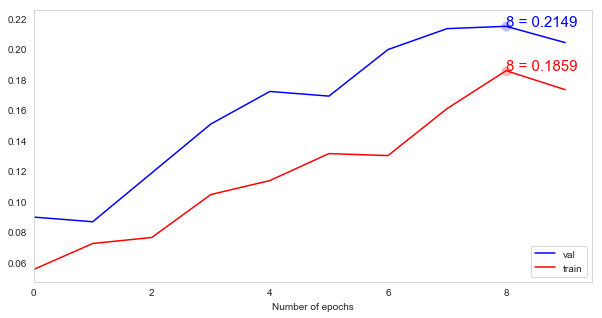

<Figure size 3600x3600 with 0 Axes>

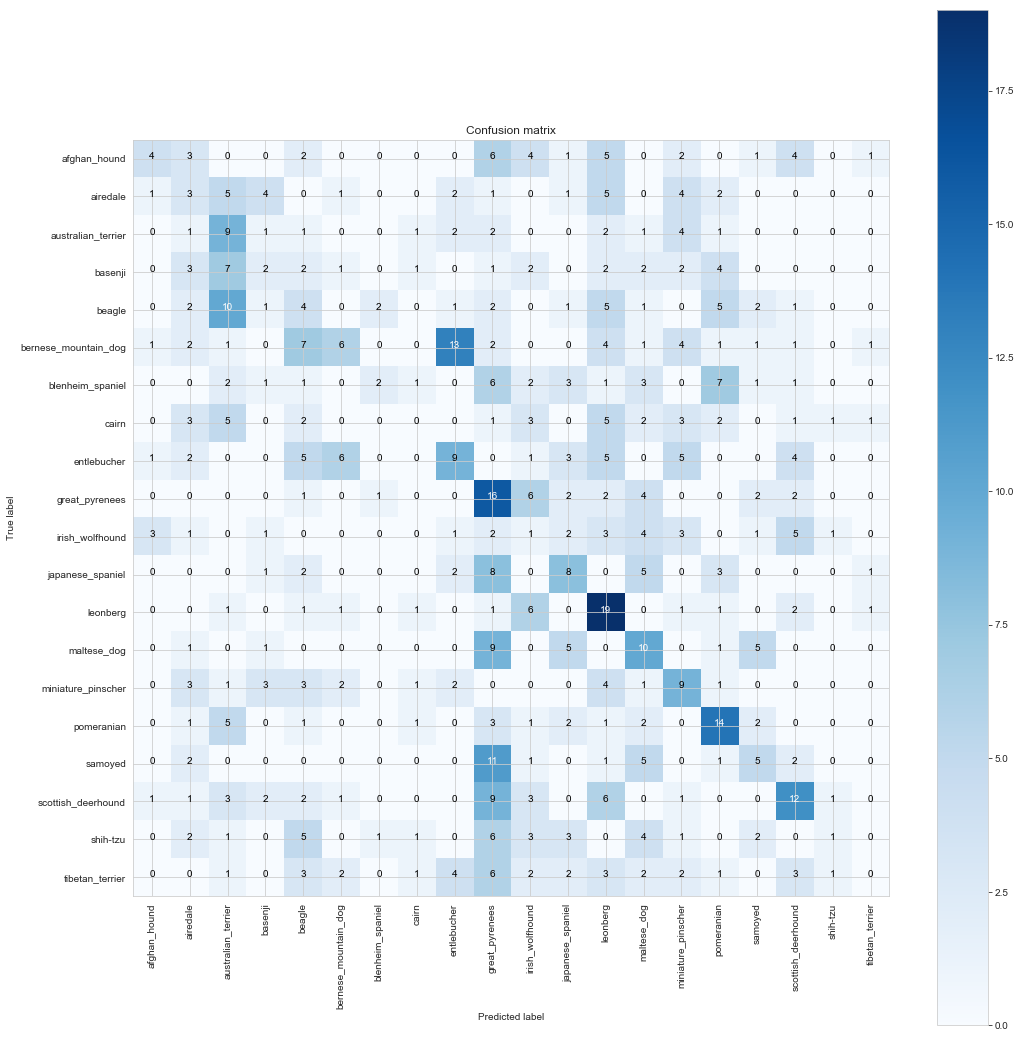

In [38]:
# visualize the learning curve and confusion matrix

y_pred_classes = np.argmax(prediction,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
plotKerasLearningCurve()
plt.show()

plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values())) 
plt.show()

### So far we have not done a very good score at identifying the type of dog in each given image. I will try another approach instead.

## Method 2 VGG16 for top 20 breeds

In [39]:
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras.models import Model
from sklearn import preprocessing

In [40]:
# Create the base pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(im_size, im_size, 3))

In [41]:
#  Adding top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_class, activation='softmax')(x)

In [42]:
# This is the model we will train
model = Model(inputs = base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience = 3, verbose = 1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 164, 164, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 164, 164, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 164, 164, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 82, 82, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 82, 82, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 82, 82, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 41, 41, 128)       0         
__________

In [43]:
# fit in the model and use epochs = 5
model.fit(x_train,y_train, epochs = 5, validation_data = (x_test,y_test), 
          verbose = 1,callbacks = [MetricsCheckpoint('logs')])

Train on 1528 samples, validate on 656 samples
Epoch 1/5
1528/1528 [==============================] - ETA: 20:09 - loss: 3.4005 - acc: 0.06 - ETA: 18:00 - loss: 3.5799 - acc: 0.03 - ETA: 16:40 - loss: 3.6000 - acc: 0.04 - ETA: 15:50 - loss: 3.6642 - acc: 0.03 - ETA: 15:29 - loss: 3.7006 - acc: 0.03 - ETA: 15:24 - loss: 3.6766 - acc: 0.05 - ETA: 14:56 - loss: 3.6443 - acc: 0.05 - ETA: 14:35 - loss: 3.5741 - acc: 0.07 - ETA: 14:07 - loss: 3.5012 - acc: 0.09 - ETA: 13:42 - loss: 3.4754 - acc: 0.09 - ETA: 13:24 - loss: 3.4420 - acc: 0.09 - ETA: 12:56 - loss: 3.4201 - acc: 0.10 - ETA: 12:29 - loss: 3.3665 - acc: 0.11 - ETA: 12:07 - loss: 3.3540 - acc: 0.11 - ETA: 11:44 - loss: 3.3039 - acc: 0.13 - ETA: 11:20 - loss: 3.2827 - acc: 0.13 - ETA: 10:59 - loss: 3.2463 - acc: 0.13 - ETA: 10:37 - loss: 3.2337 - acc: 0.13 - ETA: 10:16 - loss: 3.2022 - acc: 0.14 - ETA: 9:52 - loss: 3.1674 - acc: 0.1453 - ETA: 9:32 - loss: 3.1449 - acc: 0.157 - ETA: 9:10 - loss: 3.1109 - acc: 0.164 - ETA: 8:49 - loss:

1528/1528 [==============================] - ETA: 17:45 - loss: 0.2589 - acc: 0.96 - ETA: 17:02 - loss: 0.2174 - acc: 0.96 - ETA: 16:28 - loss: 0.2065 - acc: 0.97 - ETA: 15:53 - loss: 0.1921 - acc: 0.98 - ETA: 15:34 - loss: 0.1930 - acc: 0.98 - ETA: 15:01 - loss: 0.1962 - acc: 0.98 - ETA: 14:36 - loss: 0.2054 - acc: 0.98 - ETA: 14:17 - loss: 0.2037 - acc: 0.98 - ETA: 14:01 - loss: 0.1998 - acc: 0.98 - ETA: 13:33 - loss: 0.1937 - acc: 0.98 - ETA: 13:12 - loss: 0.1946 - acc: 0.98 - ETA: 12:56 - loss: 0.2002 - acc: 0.98 - ETA: 12:37 - loss: 0.1947 - acc: 0.98 - ETA: 12:21 - loss: 0.1904 - acc: 0.98 - ETA: 11:54 - loss: 0.1925 - acc: 0.98 - ETA: 11:30 - loss: 0.1916 - acc: 0.98 - ETA: 11:09 - loss: 0.1926 - acc: 0.98 - ETA: 10:47 - loss: 0.1903 - acc: 0.98 - ETA: 10:25 - loss: 0.1854 - acc: 0.98 - ETA: 10:03 - loss: 0.1853 - acc: 0.98 - ETA: 9:40 - loss: 0.1863 - acc: 0.9851 - ETA: 9:16 - loss: 0.1835 - acc: 0.985 - ETA: 8:55 - loss: 0.1833 - acc: 0.986 - ETA: 8:32 - loss: 0.1824 - acc: 0.

In [44]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('\nKeras CNN(VGG16) - loss:', score[0], '\n')
print('\nKeras CNN(VGG16) - accuracy:', score[1], '\n')


Keras CNN(VGG16) - loss: 1.4610964030754277 


Keras CNN(VGG16) - accuracy: 0.5457317073170732 



In [45]:
prediction = model.predict(x_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(prediction, axis = 1), target_names=list(map_characters.values())), sep='') 


                      precision    recall  f1-score   support

        afghan_hound       0.58      0.88      0.70        33
            airedale       0.31      0.45      0.37        29
  australian_terrier       0.73      0.64      0.68        25
             basenji       0.67      0.62      0.64        29
              beagle       0.70      0.43      0.53        37
bernese_mountain_dog       0.73      0.42      0.54        45
    blenheim_spaniel       0.69      0.35      0.47        31
               cairn       0.46      0.38      0.42        29
         entlebucher       0.49      0.73      0.59        41
      great_pyrenees       0.65      0.36      0.46        36
     irish_wolfhound       0.29      0.32      0.31        28
    japanese_spaniel       0.62      0.77      0.69        30
            leonberg       0.76      0.54      0.63        35
         maltese_dog       0.57      0.53      0.55        32
  miniature_pinscher       0.74      0.57      0.64        30
      

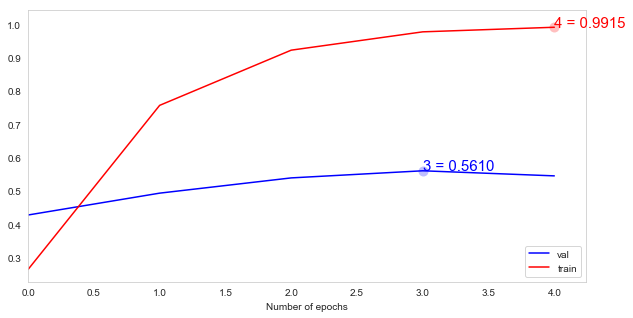

<Figure size 3600x3600 with 0 Axes>

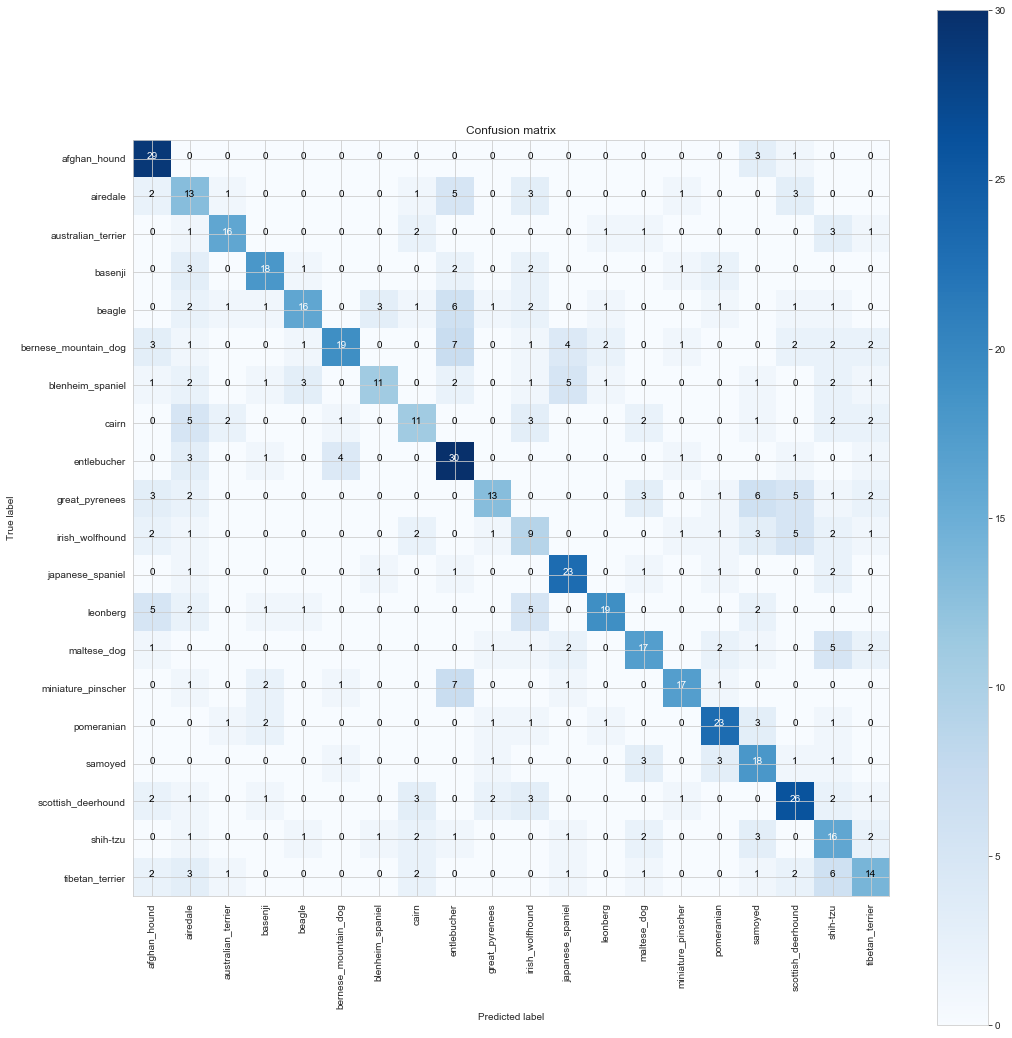

In [46]:
# visualize the  learning curve and confusion matrix

y_pred_classes = np.argmax(prediction,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plotKerasLearningCurve()
plt.show()

plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
plt.show()

We've got 54.57% accuracy, should still be able to improve the performance, perhaps using more epochs.

## Method 3 InceptionV3

In [47]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
from keras.layers import Dense, GlobalAveragePooling2D

In [71]:
# Get the InceptionV3 model so we can do transfer learning
im_width = 164
im_height = 164

base_model = InceptionV3(weights = 'imagenet', pooling='avg', include_top = False, input_shape = (im_width, im_height, 3))

In [50]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [51]:
# Add a fully-connected layer and a logistic layer with 20 classes 

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_class, activation = 'softmax')(x)

In [52]:
# This is the model we will train
model = Model(inputs = base_model.input, outputs = predictions)

In [53]:
# first: train only the top layers i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [54]:
# Compile with Adam
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
# Train the model

model.fit(x_train, y_train,  epochs = 10, validation_data = (x_test,y_test), verbose = 2, callbacks = [MetricsCheckpoint('logs')])


Train on 1528 samples, validate on 656 samples
Epoch 1/10
 - 663s - loss: 2.9269 - acc: 0.1630 - val_loss: 1.6572 - val_acc: 0.5488
Epoch 2/10
 - 624s - loss: 2.3141 - acc: 0.2925 - val_loss: 1.5462 - val_acc: 0.6280
Epoch 3/10
 - 632s - loss: 2.0049 - acc: 0.4045 - val_loss: 1.7949 - val_acc: 0.6220
Epoch 4/10
 - 630s - loss: 1.7946 - acc: 0.4686 - val_loss: 2.0753 - val_acc: 0.6082
Epoch 5/10
 - 626s - loss: 1.6003 - acc: 0.5203 - val_loss: 1.9399 - val_acc: 0.6341
Epoch 6/10
 - 625s - loss: 1.5134 - acc: 0.5530 - val_loss: 2.0269 - val_acc: 0.6220
Epoch 7/10
 - 630s - loss: 1.4107 - acc: 0.5772 - val_loss: 2.3391 - val_acc: 0.6204
Epoch 8/10
 - 623s - loss: 1.3721 - acc: 0.5602 - val_loss: 1.8338 - val_acc: 0.6494
Epoch 9/10
 - 625s - loss: 1.2159 - acc: 0.6329 - val_loss: 2.3186 - val_acc: 0.6280
Epoch 10/10
 - 633s - loss: 1.2489 - acc: 0.6021 - val_loss: 2.2907 - val_acc: 0.6098


In [56]:
score = model.evaluate(x_test, y_test, verbose = 0)

print('\nKeras CNN(InceptionV3) - loss:', score[0], '\n')
print('\nKeras CNN(InceptionV3) - accuracy:', score[1], '\n')


Keras CNN(InceptionV3) - loss: 2.290658107618006 


Keras CNN(InceptionV3) - accuracy: 0.6097560975609756 



In [57]:
prediction = model.predict(x_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(prediction, axis=1), target_names=list(map_characters.values())), sep='') 


                      precision    recall  f1-score   support

        afghan_hound       0.75      0.55      0.63        33
            airedale       0.91      0.34      0.50        29
  australian_terrier       0.39      0.48      0.43        25
             basenji       0.66      0.72      0.69        29
              beagle       0.64      0.73      0.68        37
bernese_mountain_dog       0.75      0.87      0.80        45
    blenheim_spaniel       0.39      0.71      0.51        31
               cairn       0.50      0.62      0.55        29
         entlebucher       0.92      0.54      0.68        41
      great_pyrenees       0.56      0.53      0.54        36
     irish_wolfhound       1.00      0.04      0.07        28
    japanese_spaniel       0.52      0.93      0.67        30
            leonberg       0.92      0.63      0.75        35
         maltese_dog       0.51      0.91      0.65        32
  miniature_pinscher       1.00      0.40      0.57        30
      

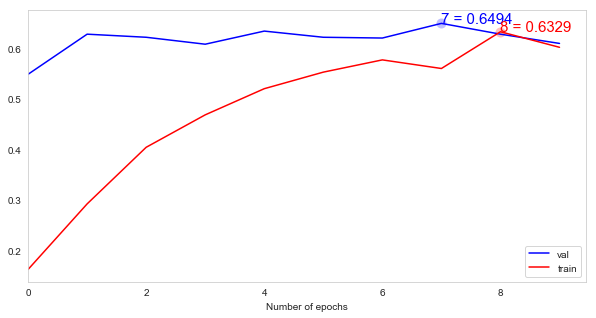

<Figure size 3600x3600 with 0 Axes>

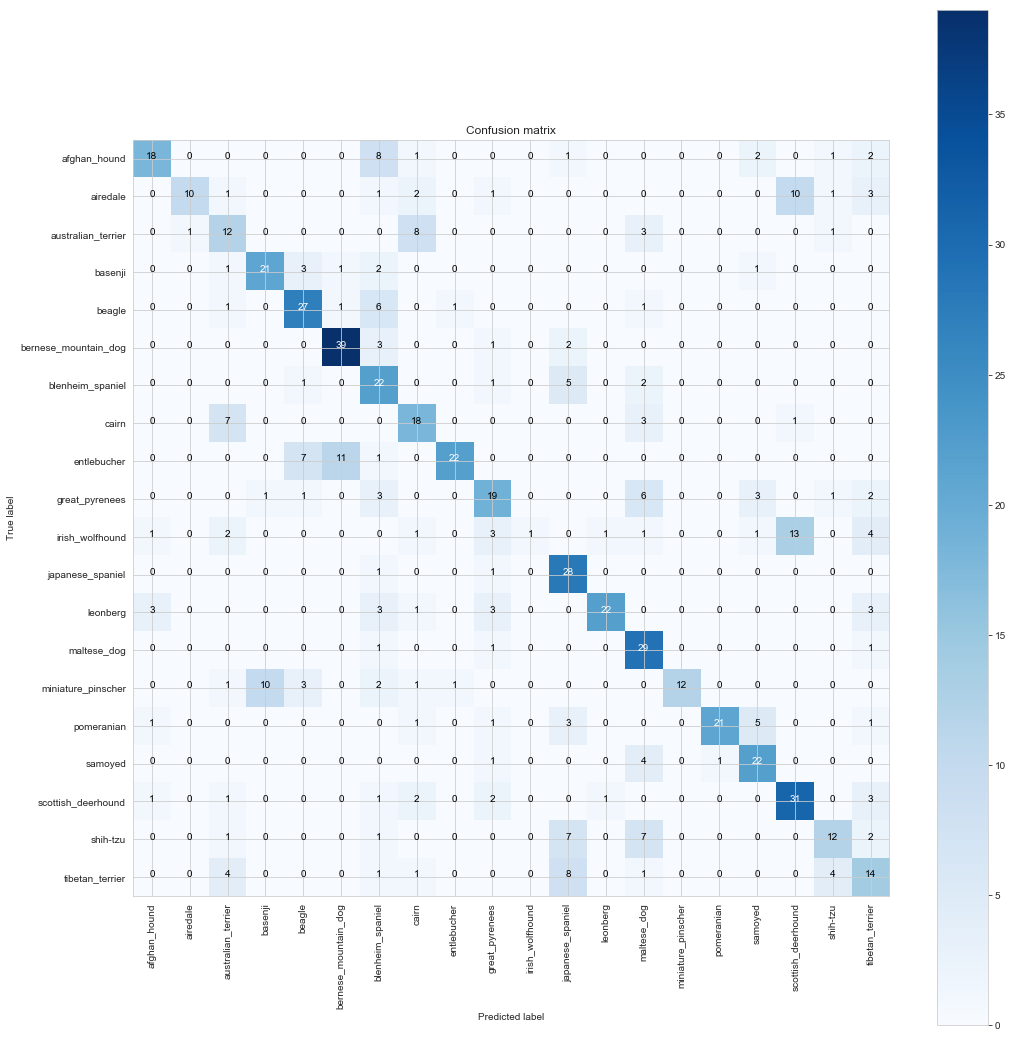

In [58]:
y_pred_classes = np.argmax(prediction,axis = 1) 
y_true = np.argmax(y_test, axis = 1) 

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

plotKerasLearningCurve()
plt.show()

plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
plt.show()

We've got 60.98% accuracy, should still be able to improve the performance, perhaps using more epochs.

## Convolutional Neural Network Approach vs VGG16 VS InceptionV3

### InceptionV3 has  60.98% accuracy based on Top 20 breeds which is the best score among thoes three models.